# 1. Data Cleaning & Preprocessing

In [31]:
#imports
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataset:", df.shape)
df.head(5)

Shape of dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Get info on columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Handling Missing Values and Duplicates

In [9]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Check for any duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

Missing values per column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

# Removing Redundant or Unnecessary Columns

Some columns may be redundant or not useful for analysis. For example, in this dataset:

*   EmployeeCount is 1 for all records (constant column).
*   StandardHours is 80 for all records (constant column).
*   Over18 is “Y” for all records (constant column).
*   EmployeeNumber is a unique identifier for each employee (not useful for pattern analysis).





In [10]:
# Drop columns that are constant or unnecessary for analysis
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df.drop(columns=cols_to_drop, inplace=True)
print("Columns dropped:", cols_to_drop)
print("New shape of dataset:", df.shape)

Columns dropped: ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
New shape of dataset: (1470, 31)


In [11]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


converting the Attrition column to a binary flag (0/1) for correlation analysis, and also convert some object columns to category type to save memory and clarify their use as categories:

In [20]:
# Convert appropriate columns to categorical type
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Create a binary Attrition flag: 1 for "Yes", 0 for "No"
df['AttritionFlag'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['AttritionFlag'] = df['AttritionFlag'].astype('int64')

# Verify data types after conversion
df.dtypes

,0
Age,int64
Attrition,category
BusinessTravel,category
DailyRate,int64
Department,category
DistanceFromHome,int64
Education,int64
EducationField,category
EnvironmentSatisfaction,int64
Gender,category


# 2. Descriptive Statistics & Summary

# Summary Statistics for Numerical Columns

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Frequency of Categorical Variables

In [15]:
# Frequency counts for categorical features
print("Attrition:\n", df['Attrition'].value_counts())
print("\nGender:\n", df['Gender'].value_counts())
print("\nDepartment:\n", df['Department'].value_counts())
print("\nJobRole (top 5):\n", df['JobRole'].value_counts().head(5))

Attrition:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

Gender:
 Gender
Male      882
Female    588
Name: count, dtype: int64

Department:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

JobRole (top 5):
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: count, dtype: int64


Calculating attrition rate

In [16]:
# Calculate attrition rate
total_employees = len(df)
num_attrition = df['Attrition'].value_counts().get('Yes', 0)
attrition_rate = num_attrition / total_employees * 100
print(f"\nAttrition Rate: {attrition_rate:.2f}%")


Attrition Rate: 16.12%


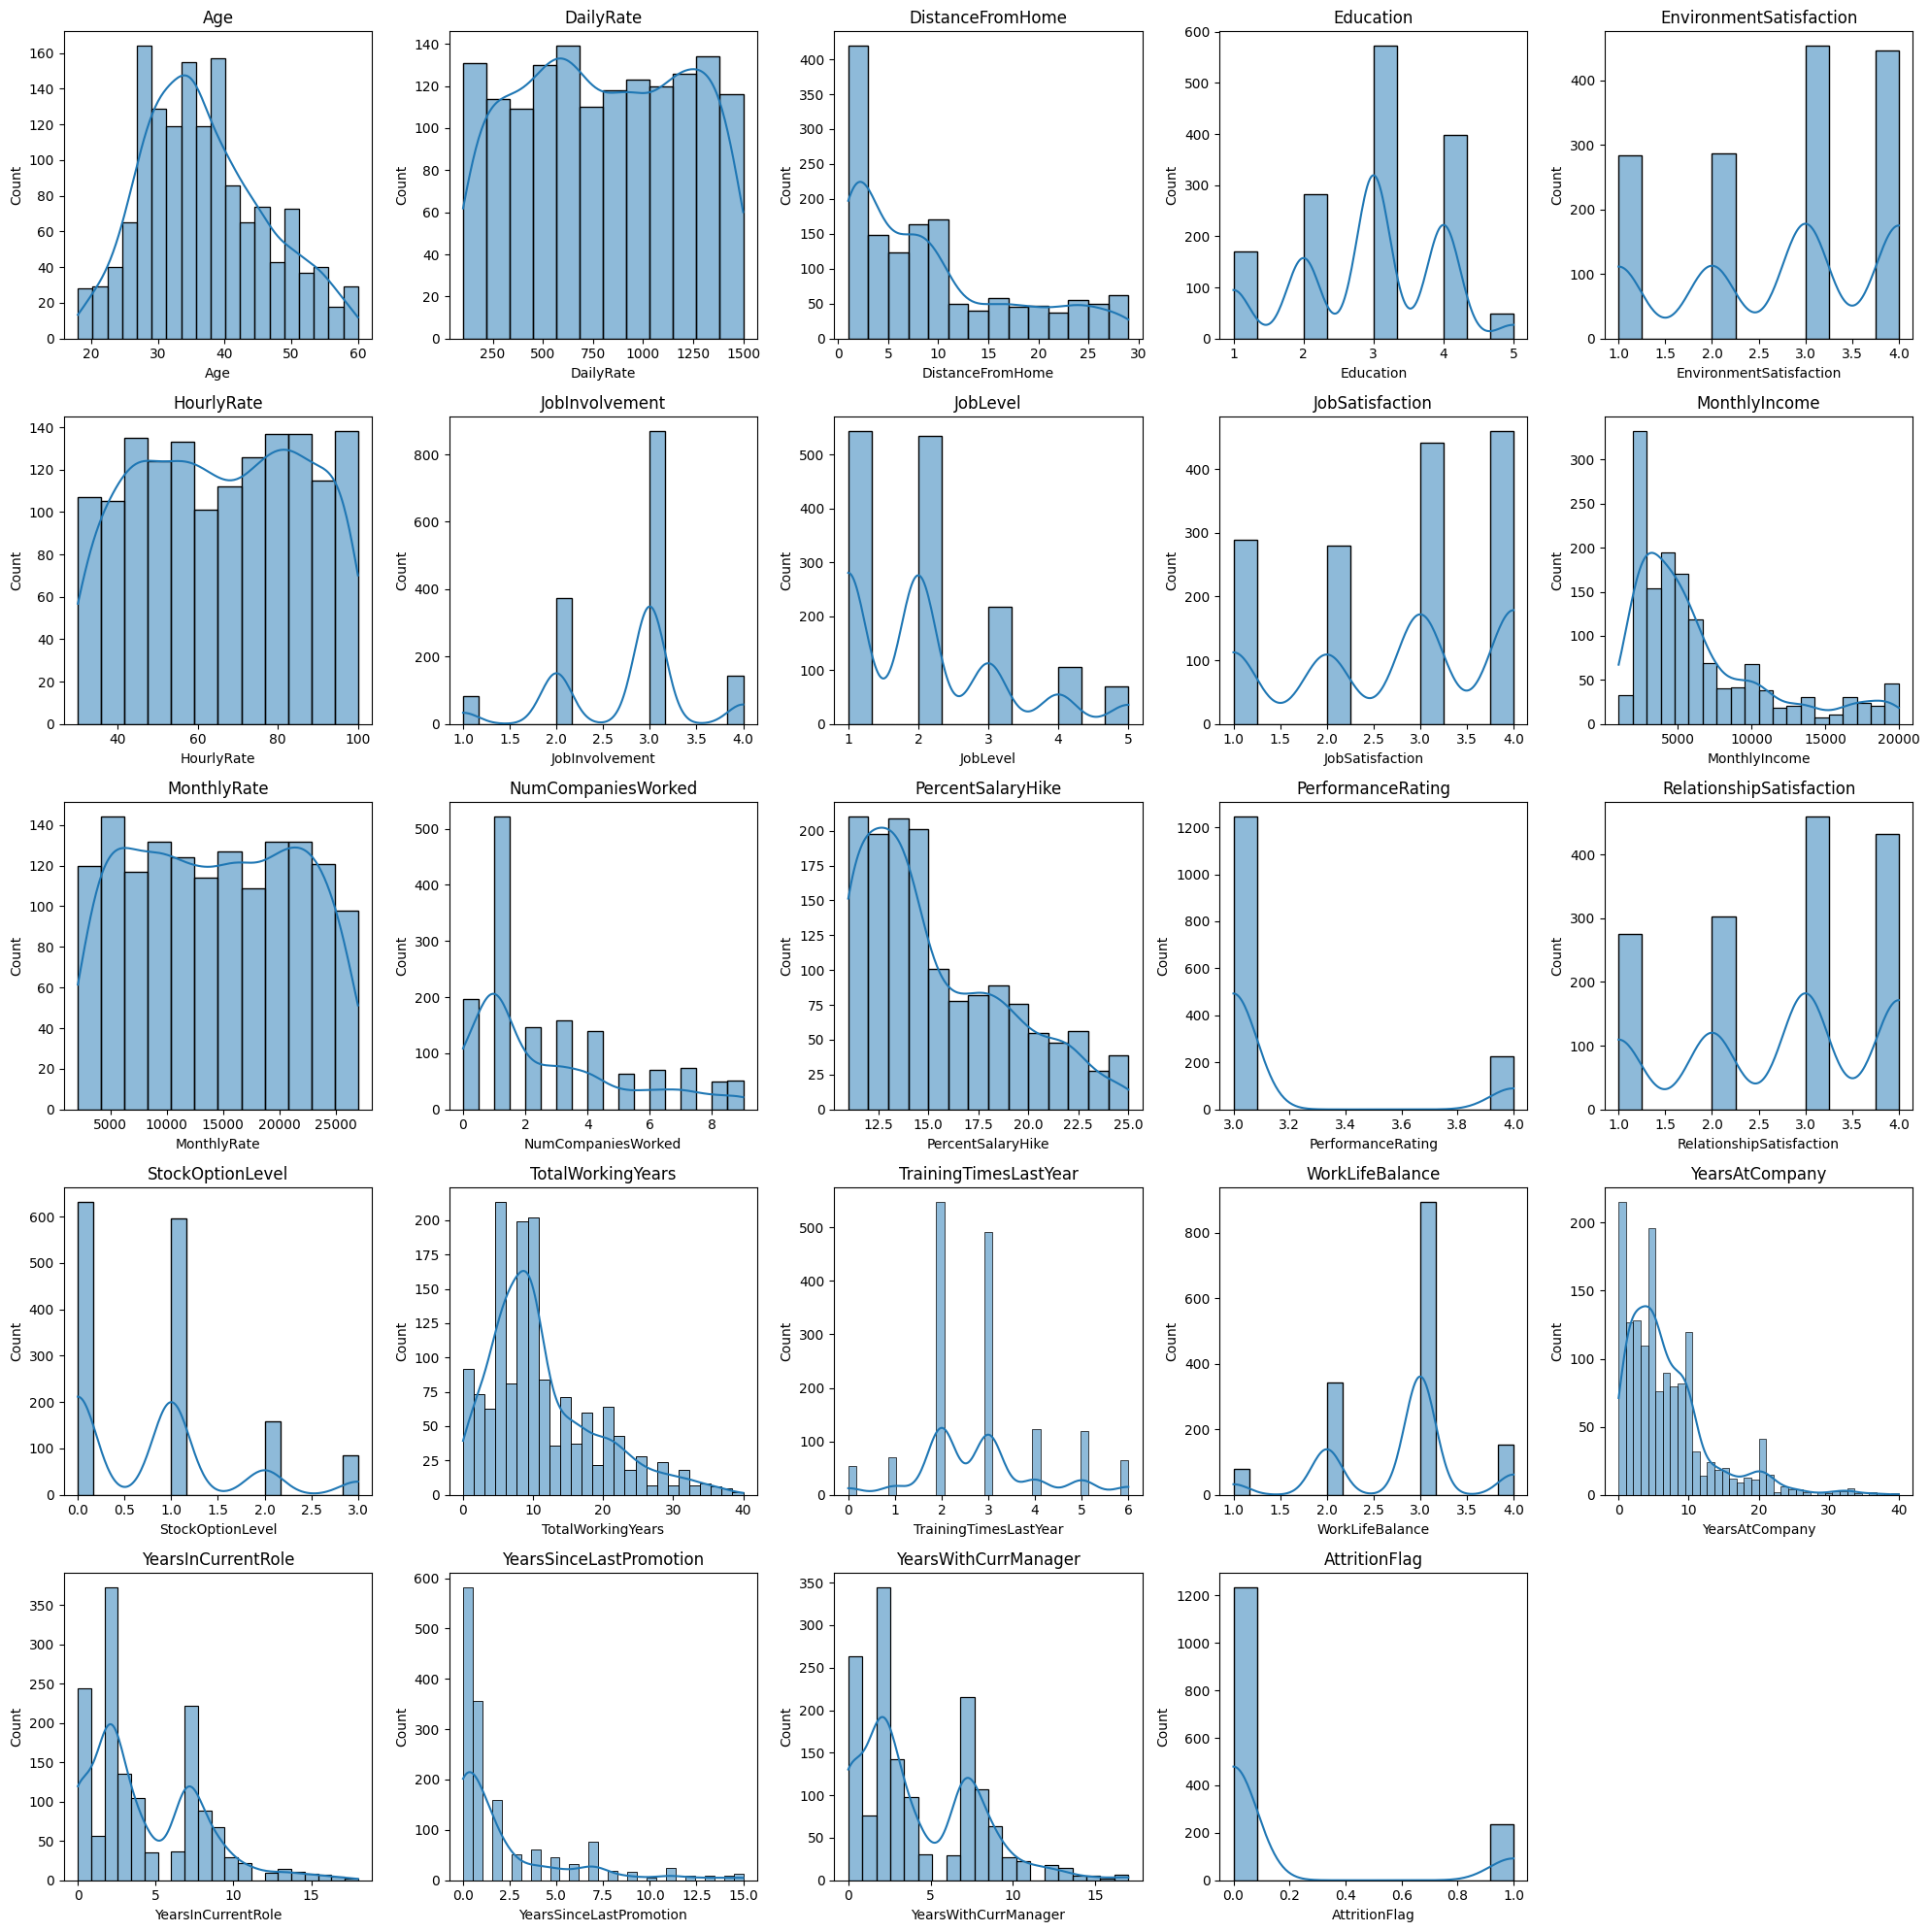

In [34]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
num_cols = numeric_df.columns
n = len(num_cols)

# Define grid layout: for example, 4 columns per row
cols = 5
rows = math.ceil(n / cols)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

# Plot a histogram with KDE for each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 3. Correlation & Feature Relationships

Correlation matrix for numerical features

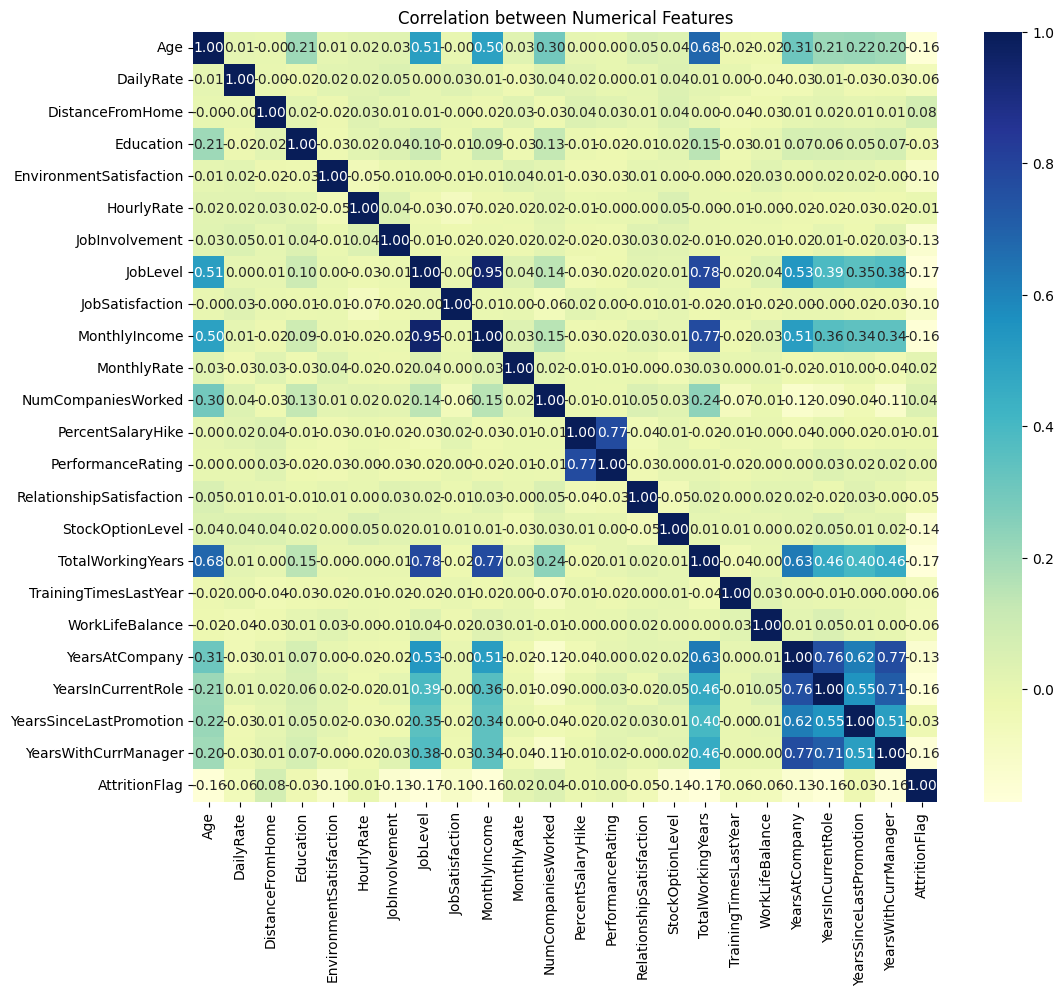

In [21]:


# Compute correlation matrix for numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation between Numerical Features")
plt.show()

# Distribution of Age by Attrition

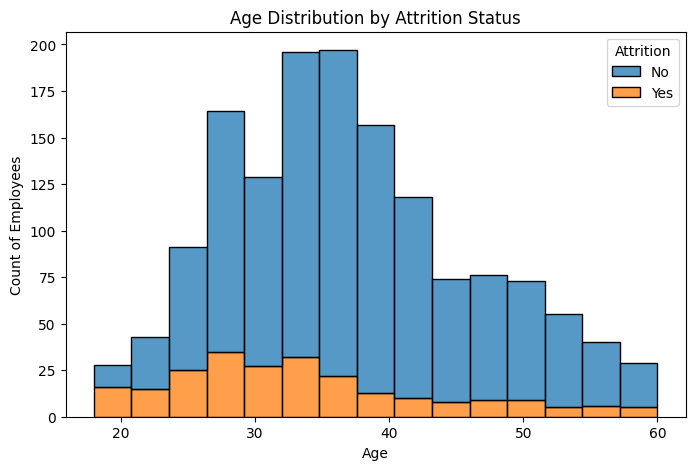

In [22]:
# Histogram of Age distribution, separated by Attrition status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=15)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count of Employees')
plt.show()

# Monthly Income by Attrition

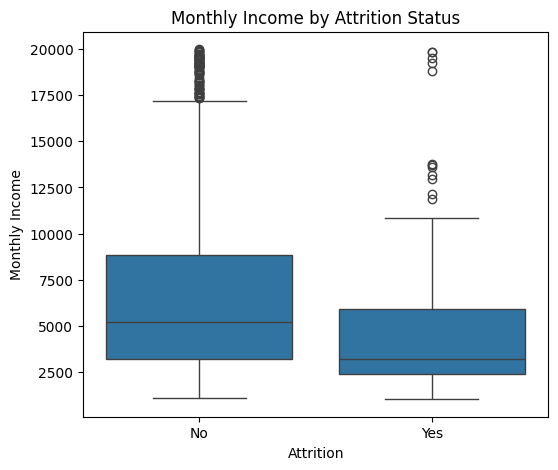

In [23]:
# Box plot of Monthly Income for employees who stayed vs left
plt.figure(figsize=(6,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

This suggests salary could be a contributing factor: lower paid employees may be more likely to leave (possibly seeking better-paying jobs).

# Attrition Rate by Overtime

<ipython-input-24-520e9475c53d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overtime_attrition = df.groupby('OverTime')['AttritionFlag'].mean().reset_index()


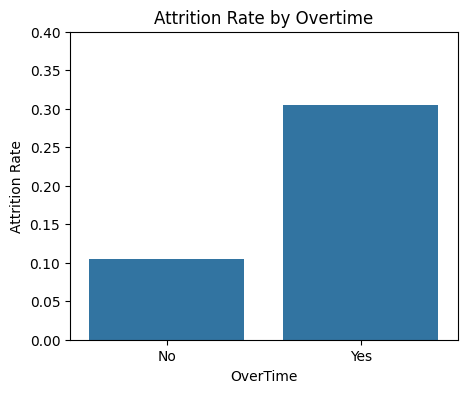

In [24]:
# Calculate attrition rate by Overtime category
overtime_attrition = df.groupby('OverTime')['AttritionFlag'].mean().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(x='OverTime', y='AttritionFlag', data=overtime_attrition)
plt.title('Attrition Rate by Overtime')
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate')
plt.ylim(0, 0.4)  # 0 to 40% for clarity
plt.show()

# Attrition Rate by Job Role

<ipython-input-25-d51d0ba1beb6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobrole_attrition = df.groupby('JobRole')['AttritionFlag'].mean().reset_index()
<ipython-input-25-d51d0ba1beb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobRole', y='AttritionFlag', data=jobrole_attrition, palette='magma')


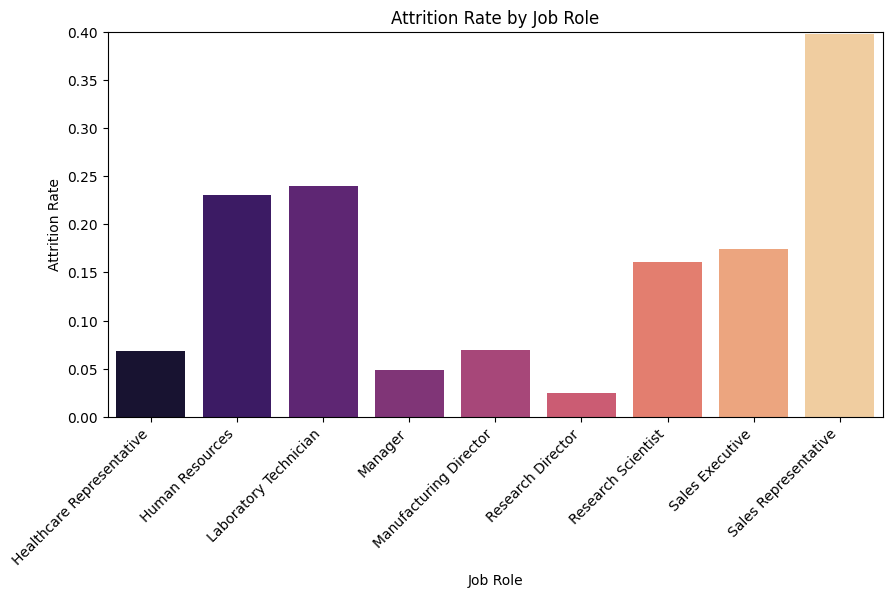

In [25]:
# Calculate attrition rate for each job role
jobrole_attrition = df.groupby('JobRole')['AttritionFlag'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='JobRole', y='AttritionFlag', data=jobrole_attrition, palette='magma')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.ylim(0, 0.4)  # Adjust the y-axis limits
plt.show()

# Attrition Rate by Department

<ipython-input-26-0b9a6eea2b6d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dept_attrition = df.groupby('Department')['AttritionFlag'].mean().reset_index()
<ipython-input-26-0b9a6eea2b6d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='AttritionFlag', data=dept_attrition, palette='viridis')


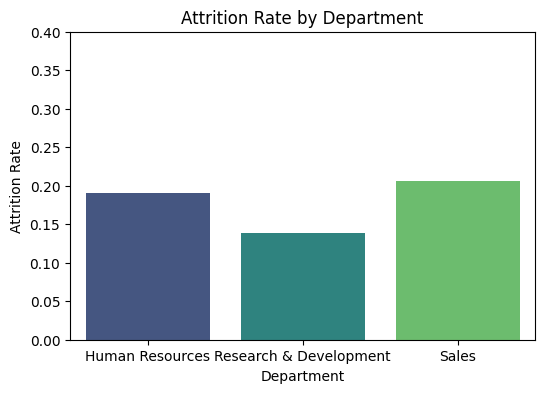

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate attrition rate for each department
dept_attrition = df.groupby('Department')['AttritionFlag'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Department', y='AttritionFlag', data=dept_attrition, palette='viridis')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.ylim(0, 0.4)  # Adjust the y-axis limits for better visibility
plt.show()

# 4. Interaction Analysis (Combining Attributes)

Attrition by Job Role and Job Satisfaction

<ipython-input-27-e77b705293dc>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['JobRole', 'JobSatLevel'])['AttritionFlag'].mean().reset_index()


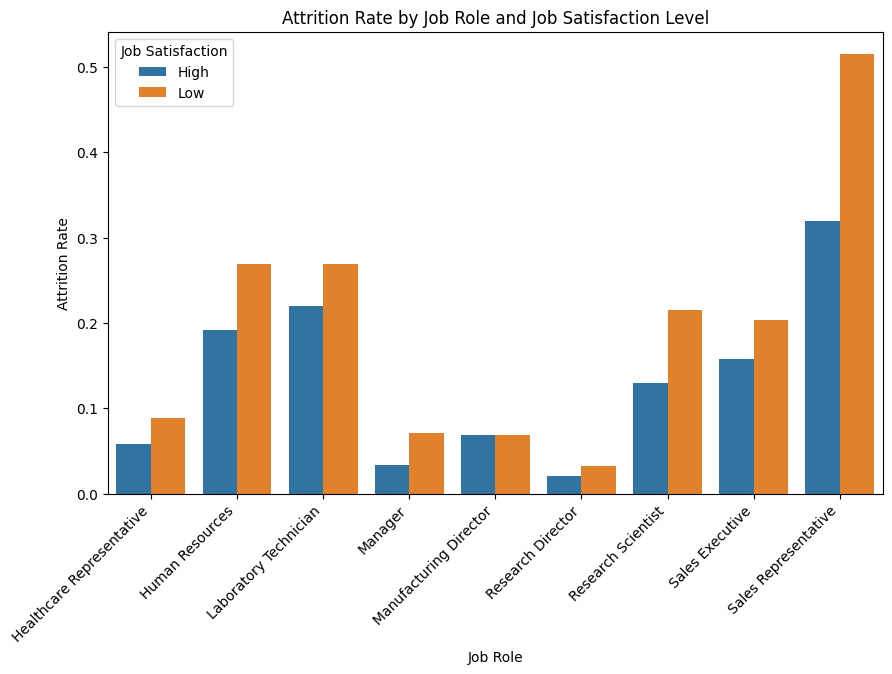

In [27]:
# Create a categorical grouping for Job Satisfaction: Low (1-2) vs High (3-4)
df['JobSatLevel'] = df['JobSatisfaction'].apply(lambda x: 'Low' if x <= 2 else 'High')

# Compute attrition rate by JobRole and JobSatLevel
grouped = df.groupby(['JobRole', 'JobSatLevel'])['AttritionFlag'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='AttritionFlag', hue='JobSatLevel', data=grouped)
plt.title('Attrition Rate by Job Role and Job Satisfaction Level')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45, ha='right')  # rotate x labels for readability
plt.legend(title='Job Satisfaction')
plt.show()

Salary Differences Across Job Roles

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.0% of the points cannot be placed

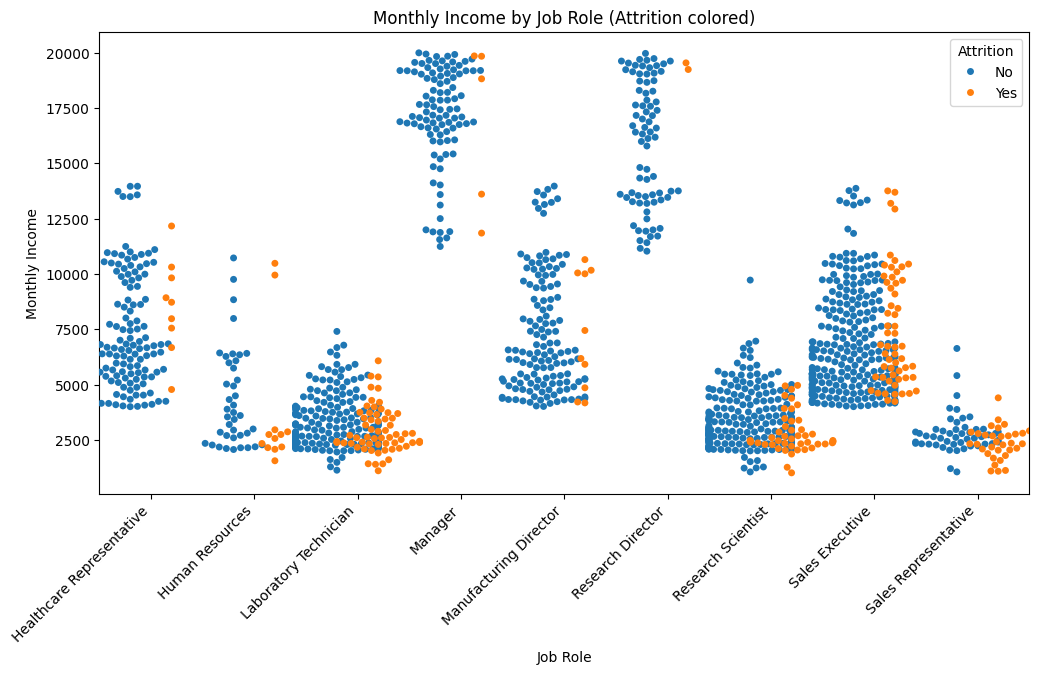

In [28]:
# Swarm plot of Monthly Income by Job Role, colored by Attrition status
plt.figure(figsize=(12,6))
sns.swarmplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, dodge=True)
plt.title('Monthly Income by Job Role (Attrition colored)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Monthly Income')
plt.xlabel('Job Role')
plt.legend(title='Attrition')
plt.show()

Attrition by Department and Tenure

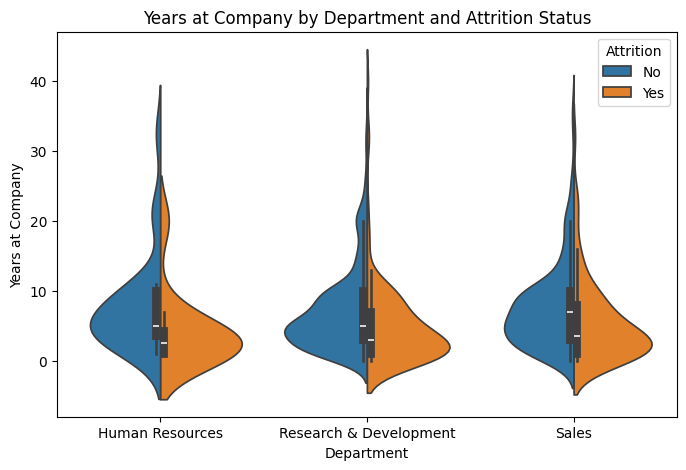

In [29]:
# Violin plot of YearsAtCompany by Department, split by Attrition status
plt.figure(figsize=(8,5))
sns.violinplot(x='Department', y='YearsAtCompany', hue='Attrition', data=df, split=True)
plt.title('Years at Company by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Years at Company')
plt.legend(title='Attrition')
plt.show()

# 5. Key Findings & Business Implications

Based on the EDA above, here are the most significant patterns and their implications for the business:


*   Overtime and Work-Life Balance: Employees who frequently worked overtime had an attrition rate (30%) nearly three times that of those who did not (~10%). Implication: Overwork is a strong predictor of leaving. The company should investigate workload and work-life balance, possibly by hiring additional staff or managing overtime hours to reduce burnout.

*   Job Satisfaction: Across all roles, employees with low job satisfaction had significantly higher attrition. For instance, in every JobRole, the attrition rate for dissatisfied employees was much higher than for satisfied ones. Implication: Improving job satisfaction (through better management, role fit, career development, or work environment) could substantially reduce turnover. HR should conduct surveys or interviews to understand and address sources of dissatisfaction.

*   Salary and Compensation: Employees who left tended to have lower salaries compared to those who stayed (the median monthly income of leavers was much lower). Within roles, those at the lower end of the pay range were more likely to attrite. Implication: Compensation appears to be a factor. The company should ensure competitive and fair pay, especially for lower-level positions and roles that show high exit rates, to boost retention.

*   Tenure and Experience: Attrition is higher among newer and younger employees – they had fewer years at the company and were often at lower job levels. Implication: Early-career employees may leave for better opportunities. This suggests a need for stronger onboarding, mentoring, and clear career progression paths. By investing in growth and training for new hires, the company might retain them longer.

*   Department/Role Differences: The Sales department showed the highest turnover, while R&D was more stable. Sales roles (e.g., Sales Representative) with lower incomes and perhaps high pressure had more attrition. Implication: Department-specific retention strategies are needed. For Sales, consider reviewing quotas, support, and incentives. For any high-turnover role, analyze the job expectations versus reality and provide additional support or adjustments.

